### Analyzing Pcal Power Sensor Calibration Data

Importing modules, establishing NIST values

In [2151]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import datetime
from collections import defaultdict
import os

# NIST = [-1.6935,-1.7067,-1.6969,-1.7140]
# NIST_dates = [datetime.datetime(2014,8,12),datetime.datetime(2015,12,17),datetime.datetime(2017,1,23),datetime.datetime(2018,2,28)]
# NIST_error = [0.065, 0.0481, 0.053, 0.0675]

NIST = [-1.630, -1.702775, -1.6935,-1.7067,-1.6969,-1.7140]
NIST_dates = [datetime.datetime(2007,9,20), datetime.datetime(2010,3,16), datetime.datetime(2014,8,12),datetime.datetime(2015,12,17),datetime.datetime(2017,1,23),datetime.datetime(2018,2,28)]
NIST_error = [0.095, 0.035, 0.065, 0.0481, 0.053, 0.0675]

Parsing matlab data sheet. This contains WS1/WSH values post-PD replacement in the GS. Comments have been deleted from the data pre-parsing.

In [2152]:
calibration_vals = np.genfromtxt('pcalPowercalRatios.m', dtype = float, usecols = 1)
calibration_ids = np.genfromtxt('pcalPowercalRatios.m', dtype = str, usecols = 0)
print (calibration_ids[0:5])
print (calibration_vals[0:5])

['PCAL_D20140815T1634_RAT_WS_GS' 'PCAL_D20140826T1512_RAT_WS_GS'
 'PCAL_D20140828T1435_RAT_WS_GS' 'PCAL_D20140902T1602_RAT_WS_GS'
 'PCAL_D20140905T1309_RAT_WS_GS']
[1.872478 1.873189 1.872031 1.872236 1.868579]


Retrieving data from 2008-2013 and converting GPS-time dates to datetime objects. Also including more recent measurements and dates.

In [2153]:
new_dates = []
gps_dates = np.genfromtxt('../../pcal_svn/PhotonCalibrator/measurements/LabData_2012-2013/GS_WS-ALL/data.txt', usecols=0)
early_vals = np.genfromtxt('../../pcal_svn/PhotonCalibrator/measurements/LabData_2012-2013/GS_WS-ALL/data.txt', usecols=2)
for idx, val in enumerate(gps_dates):
    new_date = datetime.datetime(1980,1,6)+datetime.timedelta(seconds=val-(35-19))
    new_dates.append(new_date)
    
sample_calibrations = [0.8268487, 0.8240138, 0.8246583, 0.8233268, 0.8252861, 0.8242799, 0.8246197, 0.8252857, 0.8236029, 0.8246453, 0.8261193, 0.8254199, 0.82436, 0.8251545, 0.8257822, 0.8248106]
sample_dates = []
for i in range(len(sample_calibrations)):
    sample_dates.append(datetime.datetime(2018,3,23,12))

0.0005902418158894651 0.8253593142857143
0.0008846570055456155 0.82488835625


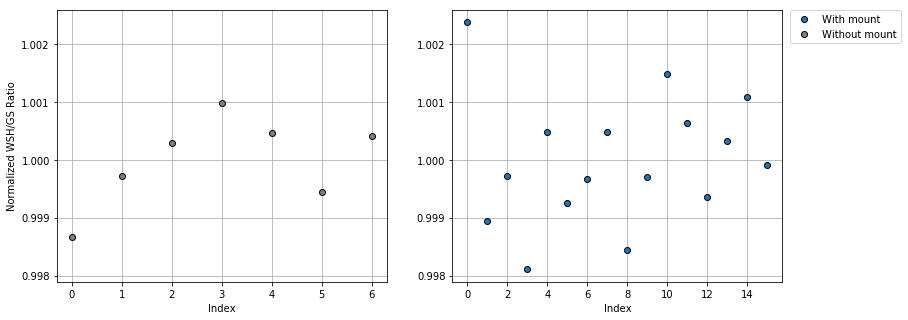

0.0570935487385583


In [2154]:
mountless_cal = [0.8242657, 0.8251281, 0.8255932, 0.8261762, 0.8257374, 0.8249080, 0.8257066]
print (np.std(mountless_cal), np.mean(mountless_cal))
print (np.std(sample_calibrations), np.mean(sample_calibrations))
temp_mean = np.mean(mountless_cal)
mountless_cal[:] = [x/temp_mean for x in mountless_cal]
temp_mean = np.mean(sample_calibrations)
sample_calibrations[:] = [x/temp_mean for x in sample_calibrations]
plt.figure(figsize=(13,5))
ax1=plt.subplot(121)
plt.grid()
plt.xlabel('Index')
plt.ylabel('Normalized WSH/GS Ratio')
plt.plot(mountless_cal, marker = 'o', color = 'gray', linestyle='', mec='k')
ax2=plt.subplot(122, sharey=ax1)
plt.grid()
plt.xlabel('Index')
plt.plot(sample_calibrations, marker = 'o', linestyle='', mec='k', label='With mount')
plt.plot([], marker = 'o', color = 'gray', linestyle='', mec='k', label='Without mount')
plt.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0.)
plt.savefig('mount_plot.png', bbox_inches='tight')
plt.show()

Separating 2014-2018 data by measurement device type and extracting dates (including an extra key "WS_GS_alt" for pre-photodiode replacement measurements).

In [2155]:
pwr_vals = defaultdict(list)
pwr_dates = defaultdict(list)
for idx, val in enumerate(calibration_ids):
    date = datetime.datetime(int(val[6:10]), int(val[10:12]), int(val[12:14]), int(val[15:17]), int(val[17:19]))
    if val[24:] == 'WS1_GS' and date < datetime.datetime(2015, 2, 12, 15):
        pwr_dates['WS1_GS_alt'].append(date)
        pwr_vals['WS1_GS_alt'].append(calibration_vals[idx])
    else:
        pwr_dates[val[24:]].append(date)
        pwr_vals[val[24:]].append(calibration_vals[idx])
    if val[24:] == 'WS_GS':
        pwr_dates['WS1_GS_alt'].append(date)
        pwr_vals['WS1_GS_alt'].append(calibration_vals[idx])

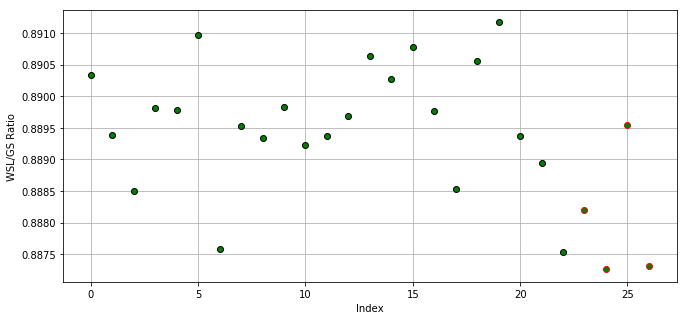

In [2156]:
sample_WSL = [0.8882029, 0.887259, 0.8895526, 0.8873081]

sample_idx = np.arange(start = len(pwr_vals['WSL_GS']), stop = len(sample_WSL)+len(pwr_vals['WSL_GS']))

plt.figure(figsize=(11,5))
# plt.plot(pwr_dates['WSL_GS'], pwr_vals['WSL_GS'], 'go', mec = 'k')
plt.plot(pwr_vals['WSL_GS'], color='g', mec = 'k', linestyle='', marker='o')
plt.plot(sample_idx, sample_WSL, 'go', mec='r')
plt.grid()
plt.xlabel('Index')
plt.ylabel('WSL/GS Ratio')
plt.show()

The datasets are then plotted and inspected, starting with values before the GS photodiode was changed (contained in pcal_svn/PhotonCalibrator/measurements/LabData_2012-2013). The normalized standard deviation is printed below the plot.

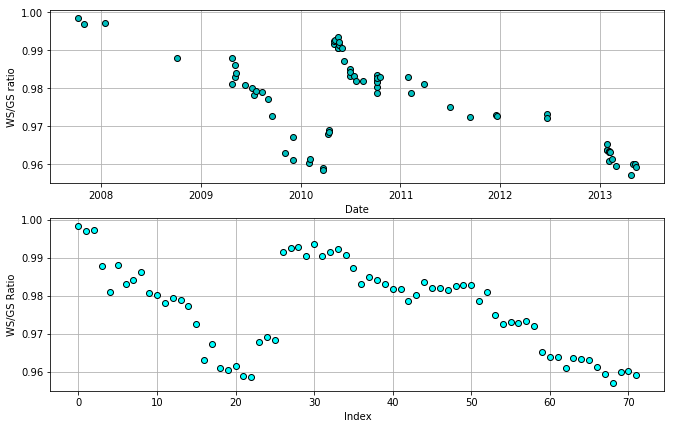

1.1758916280868033


In [2157]:
plt.figure(figsize=(11,7))
plt.subplot(2,1,1)
plt.plot(new_dates, early_vals, 'co', mec='k')
plt.grid()
plt.xlabel('Date')
plt.ylabel('WS/GS ratio')
# plt.xlim(datetime.date(2010,4,1), datetime.date(2010,6,1))
# plt.savefig('cal_plot_5.png')
# plt.show()

plt.subplot(2,1,2)
# plt.figure(figsize=(11,4))
plt.plot(early_vals, marker = 'o', linestyle = '', color = 'cyan', mec = 'k')
plt.grid()
plt.xlabel('Index')
plt.ylabel('WS/GS Ratio')
plt.savefig('cal_plot_10.png')
plt.show()

print (100*np.std(early_vals)/np.mean(early_vals))

Then we inspect the the measurements taken before the WS photodiodes were changed.

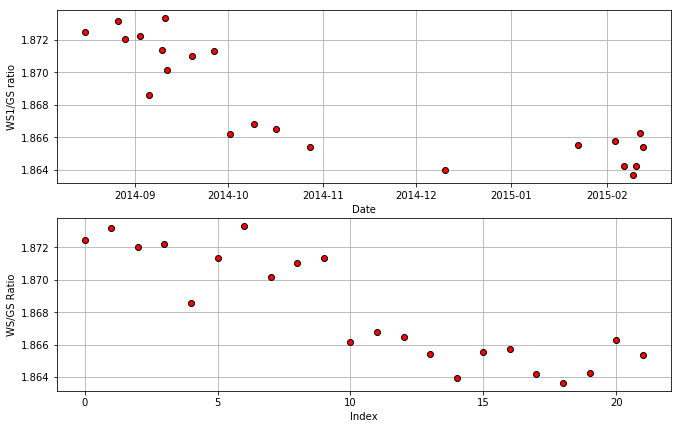

0.178365121952344


In [2158]:
plt.figure(figsize=(11,7))
plt.subplot(2,1,1)
plt.plot(pwr_dates['WS1_GS_alt'], pwr_vals['WS1_GS_alt'], 'ro', mec = 'k')
plt.grid()
plt.xlabel('Date')
plt.ylabel('WS1/GS ratio')
# plt.show()

plt.subplot(2,1,2)
# plt.figure(figsize=(11,4))
plt.plot(pwr_vals['WS1_GS_alt'], color = 'red', mec = 'k', marker = 'o', linestyle = '')
plt.grid()
plt.xlabel('Index')
plt.ylabel('WS/GS Ratio')
plt.savefig('cal_plot_7.png')
plt.show()

print (100*np.std(pwr_vals['WS1_GS_alt'])/np.mean(pwr_vals['WS1_GS_alt']))

Next is the dataset before WS1 was damaged. The two values at the end of the measurement were post-damaging, and are removed from the dataset.

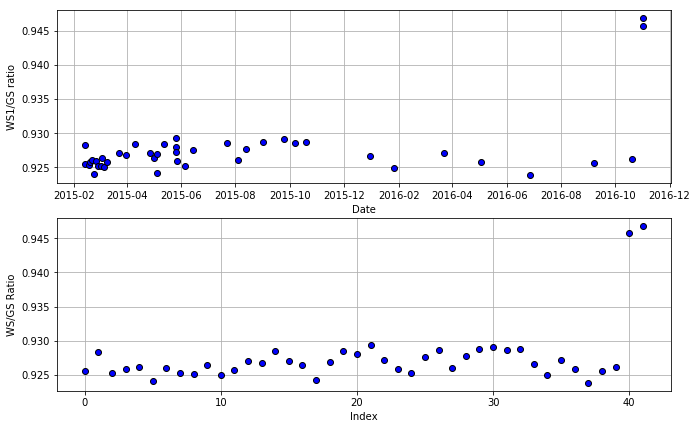

0.15674828606226984


In [2159]:
plt.figure(figsize=(11,7))
plt.subplot(2,1,1)
plt.plot(pwr_dates['WS1_GS'], pwr_vals['WS1_GS'], 'bo', mec = 'k')
plt.grid()
plt.xlabel('Date')
plt.ylabel('WS1/GS ratio')
# plt.show()

# plt.figure(figsize=(11,4))
plt.subplot(2,1,2)
plt.plot(pwr_vals['WS1_GS'], color = 'blue', mec = 'k', marker = 'o', linestyle = '')
plt.grid()
plt.xlabel('Index')
plt.ylabel('WS/GS Ratio')
plt.savefig('cal_plot_6.png')
plt.show()

print (100*np.std(pwr_vals['WS1_GS'][0:-2])/np.mean(pwr_vals['WS1_GS'][0:-2]))
for i in range(2):
    del pwr_vals['WS1_GS'][-1]
    del pwr_dates['WS1_GS'][-1]

Then is the set of measurements until the present. The last set of 12 measurements was taken in quick succession over a two day period. The offset and spread of the values is currently being investigated. Averages using this dataset will for now exclude these points.

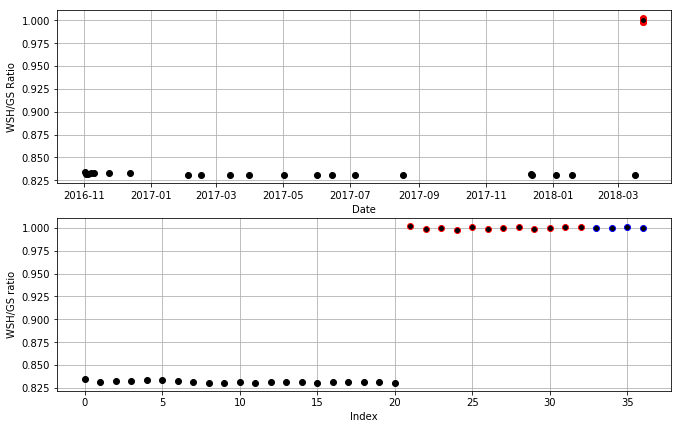

0.12939219852036973


In [2160]:
sample_list = np.arange(len(sample_calibrations))+len(pwr_vals['WSH_GS'])

plt.figure(figsize=(11,7))
plt.subplot(2,1,1)
plt.plot(pwr_dates['WSH_GS'], pwr_vals['WSH_GS'], 'ko')
plt.plot(sample_dates, sample_calibrations, 'ko', mec = 'r')
plt.grid()
plt.xlabel('Date')
plt.ylabel('WSH/GS Ratio')
# plt.show()

# plt.figure(figsize=(11, 4))
plt.subplot(2,1,2)
plt.plot(pwr_vals['WSH_GS'], marker = 'o', linestyle="", color = 'black')
plt.plot(sample_list[0:-4], sample_calibrations[0:-4], marker = 'o', linestyle="", color = 'black', mec = 'red')
plt.plot(sample_list[-4:], sample_calibrations[-4:], marker = 'o', linestyle="", color = 'black', mec = 'blue')
plt.grid()
plt.ylabel('WSH/GS ratio')
plt.xlabel('Index')
plt.savefig('WSH_GS_3.png')
plt.show()

print (100*np.std(pwr_vals['WSH_GS'])/np.mean(pwr_vals['WSH_GS']))

The are power sensor jumps between three sections of the Hanford working standard, attributed to photodiode replacement in GS (first break), photodiode replacement in WSH (second break) and working standard replacement (third break).

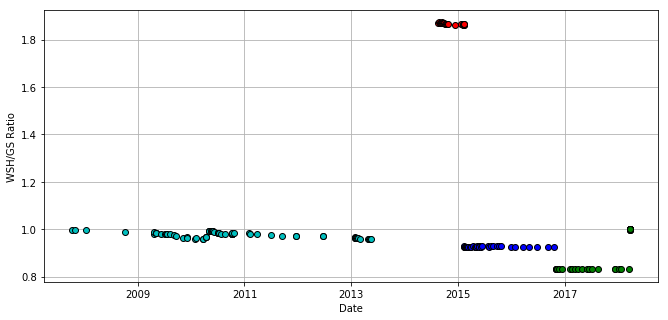

In [2161]:
plt.figure(figsize=(11, 5))
plt.plot(new_dates, early_vals, 'co', mec='k', label = "WS")
plt.plot(pwr_dates['WS1_GS_alt'], pwr_vals['WS1_GS_alt'], 'ro', mec = 'k', label = "WS1 (previous photodiode)")
plt.plot(pwr_dates['WS1_GS'], pwr_vals['WS1_GS'], 'bo', mec = 'k', label = "WS1 (current photodiode)")
plt.plot(pwr_dates['WSH_GS'], pwr_vals['WSH_GS'], 'go', mec = 'k', label = "WSH")
plt.plot(sample_dates, sample_calibrations, marker='o',color = 'green', mec='k', linestyle='')
plt.ylabel('WSH/GS Ratio')
plt.xlabel('Date')
plt.grid()
plt.show()

These are solved by taking the ratio of the closest values in time between each set and scaling to the right-side set

In [2162]:
pwr_vals['WS1_GS'][:] = [x * (pwr_vals['WSH_GS'][0]/pwr_vals['WS1_GS'][-1]) for x in pwr_vals['WS1_GS']]
pwr_vals['WS1_GS_alt'][:] = [x * (pwr_vals['WS1_GS'][0]/pwr_vals['WS1_GS_alt'][-1]) for x in pwr_vals['WS1_GS_alt']]
early_vals[:] = [x * (pwr_vals['WS1_GS_alt'][0]/early_vals[-1]) for x in early_vals]

This results in the following plot:

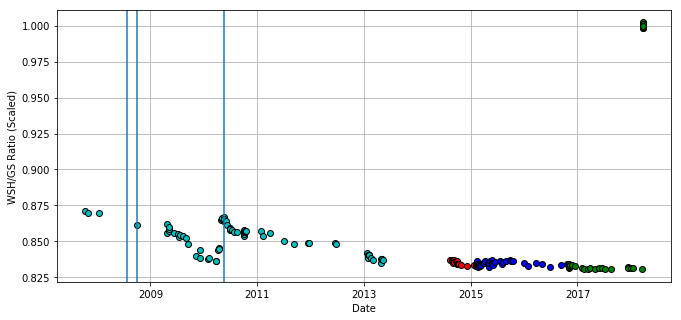

In [2163]:
plt.figure(figsize=(11, 5))
plt.plot(new_dates, early_vals, 'co', mec='k', label = "WS")
plt.plot(pwr_dates['WS1_GS_alt'], pwr_vals['WS1_GS_alt'], 'ro', mec = 'k', label = "WS1 (previous photodiode)")
plt.plot(pwr_dates['WS1_GS'], pwr_vals['WS1_GS'], 'bo', mec = 'k', label = "WS1 (current photodiode)")
plt.plot(pwr_dates['WSH_GS'], pwr_vals['WSH_GS'], 'go', mec = 'k', label = "WSH")
plt.plot(sample_dates, sample_calibrations, marker='o',color = 'green', mec='k', linestyle='')
plt.axvline(datetime.date(2008,7,23)) #first calibration procedure draft
plt.axvline(datetime.date(2008,10,3)) #PD repaired (which PD is not specified)
plt.axvline(datetime.date(2010,5,20)) #WS D9 connector replaced with DB9 connector
plt.ylabel('WSH/GS Ratio (Scaled)')
plt.xlabel('Date')
plt.grid()
plt.show()

In [2164]:
# for idx, val in enumerate(pwr_dates['WSH_GS'][1:]):
#     if pwr_dates['WSH_GS'][idx-1]-NIST_dates[4] < datetime.timedelta(0) and val-NIST_dates[4] > datetime.timedelta(0):
#         rat1 = pwr_vals['WSH_GS'][idx+1]/pwr_vals['WSH_GS'][idx]
#         pwr_vals['WSH_GS'][:idx+1] = [x * rat1 for x in pwr_vals['WSH_GS'][:idx+1]]
#         pwr_vals['WS1_GS'][:] = [x * rat1 for x in pwr_vals['WS1_GS']]
#         pwr_vals['WS1_GS_alt'][:] = [x * rat1 for x in pwr_vals['WS1_GS_alt']]
#         early_vals[:] = [x * rat1 for x in early_vals]
#         break
        
# for idx, val in enumerate(pwr_dates['WS1_GS'][1:]):
#     if pwr_dates['WS1_GS'][idx-1]-NIST_dates[3] < datetime.timedelta(0) and val-NIST_dates[3] > datetime.timedelta(0):
#         rat2 = pwr_vals['WS1_GS'][idx+1]/pwr_vals['WS1_GS'][idx]
#         pwr_vals['WS1_GS'][:idx+1] = [x * rat2 for x in pwr_vals['WS1_GS'][:idx+1]]
#         pwr_vals['WS1_GS_alt'][:] = [x * rat2 for x in pwr_vals['WS1_GS_alt']]
#         early_vals[:] = [x * rat2 for x in early_vals]
#         break

# for idx, val in enumerate(new_dates[1:]):
#     if new_dates[idx-1]-NIST_dates[1] < datetime.timedelta(0) and val-NIST_dates[1] > datetime.timedelta(0):
#         rat3 = early_vals[idx+1]/early_vals[idx]
#         early_vals[:idx+1] = [x * rat3 for x in early_vals[:idx+1]]
#         break
        
# print (100*(1-np.sqrt(rat1)))
# print (100*(1-np.sqrt(rat2)))
# print (100*(1-np.sqrt(rat3)))

Next the datasets are normalized to the mean value of WSH_GS (the flat part).

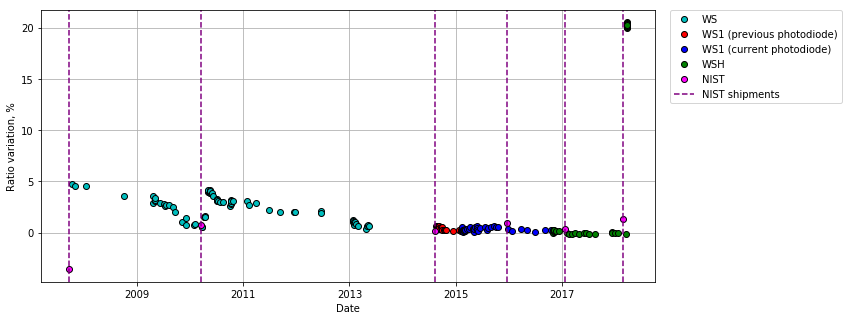

In [2165]:
sample_calibrations[:] = [((x / np.mean(pwr_vals['WSH_GS']))-1)*100 for x in sample_calibrations]
early_vals[:] = [((x / np.mean(pwr_vals['WSH_GS']))-1)*100 for x in early_vals]
for key in pwr_vals:
    if key == 'WS1_GS_alt' or key == 'WS1_GS':
        pwr_vals[key][:] = [((x / np.mean(pwr_vals['WSH_GS']))-1)*100 for x in pwr_vals[key]]
    else:
        temp_mean = np.mean(pwr_vals[key])
        pwr_vals[key][:] = [((x / temp_mean)-1)*100 for x in pwr_vals[key]]
NIST[:] = [((x / np.mean(NIST))-1)*100 for x in NIST]

plt.figure(figsize=(11, 5))
plt.plot(new_dates, early_vals, 'co', mec='k', label = "WS")
plt.plot(pwr_dates['WS1_GS_alt'], pwr_vals['WS1_GS_alt'], 'ro', mec = 'k', label = "WS1 (previous photodiode)")
plt.plot(pwr_dates['WS1_GS'], pwr_vals['WS1_GS'], 'bo', mec = 'k', label = "WS1 (current photodiode)")
plt.plot(pwr_dates['WSH_GS'], pwr_vals['WSH_GS'], 'go', mec = 'k', label = "WSH")
plt.plot(sample_dates, sample_calibrations, marker='o',color = 'green', mec='k', linestyle='')
# plt.plot(pwr_dates['WSL_GS'], pwr_vals['WSL_GS'], 'bo', mec = 'k', label = "WSL")
plt.plot(NIST_dates, NIST, marker = 'o', linestyle = 'None', color = 'magenta', mec = 'k', label = "NIST")
# plt.errorbar(NIST_dates, NIST, yerr=NIST_error, ecolor='cyan', fmt='None')
for i in NIST_dates:
    if i == NIST_dates[0]:
        plt.axvline(i, linestyle = '--', color = 'purple', label = "NIST shipments")
    else:
        plt.axvline(i, linestyle = '--', color = 'purple')
plt.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0.)
plt.ylabel('Ratio variation, %')
plt.xlabel('Date')
# plt.xlim(datetime.date(2014,6,1), datetime.date(2018,4,1))
# plt.ylim(-0.5,1.5)
plt.grid()
plt.savefig('cal_plot_9.png', bbox_inches='tight')
plt.show()

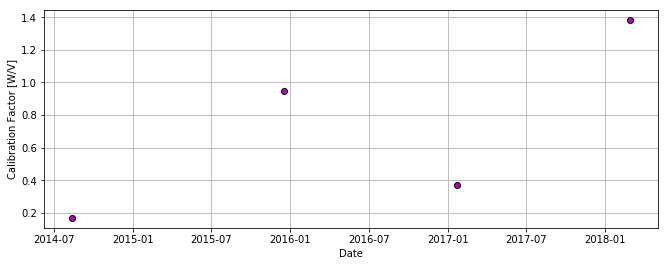

66.71848400373634


In [2166]:
plt.figure(figsize=(11,4))
plt.plot(NIST_dates[2:], NIST[2:], 'mo', mec='k')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Calibration Factor [W/V]')
plt.show()

print (100*np.std(NIST[2:])/np.mean(NIST[2:]))

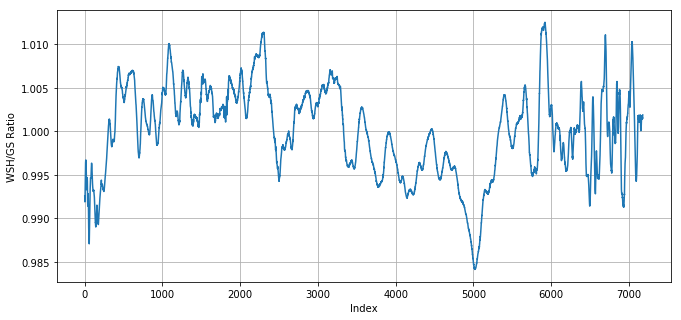

In [2167]:
a = np.genfromtxt('2018-04-11T1202_meas_GSRefl.csv', skip_header=1,delimiter=',', usecols = 1)
b = np.genfromtxt('2018-04-11T1202_meas_WSHTran.csv', skip_header=1,delimiter=',', usecols = 1)
c = b/a
c /= np.mean(c)
plt.figure(figsize=(11,5))
plt.plot(c)
plt.grid()
plt.ylabel('WSH/GS Ratio')
plt.xlabel('Index')
plt.savefig('BS_temp_check.png')
plt.show()